In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

GR-KURUMI analogread analysis


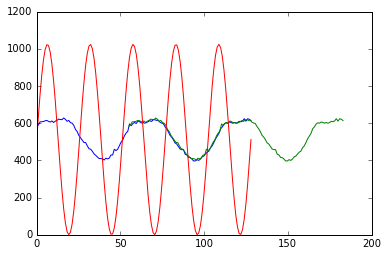

In [3]:
data=np.loadtxt('kurumi_B2.dat', delimiter=',')
ts = np.linspace(0,128,128);
#plt.plot(ts,data[0:128], ts+55,data[0:128])

sig=np.sin(5*2*np.pi * ts)+1
sig=sig*512
plt.plot(ts,data[0:128], ts+55,data[0:128], ts,sig)
plt.show()

In [4]:
def funcM(x,t):
    ret=sum(x[0:N2])+sum(x[t:N2+t])
    return ret

nsdf[0]= 1.0 ,nsdf[53]= 0.744088207515 nsdf[54]= 0.747991696587 nsdf[55]= 0.741261244099
[  1.00000000e+00   9.84708215e-01   9.60213746e-01   9.24412647e-01
   8.77418783e-01   8.21137101e-01   7.56185229e-01   6.83114928e-01
   6.04390904e-01   5.19785091e-01   4.29414785e-01   3.36254851e-01
   2.38230435e-01   1.36728111e-01   3.49256643e-02  -6.93607834e-02
  -1.72283775e-01  -2.73314978e-01  -3.71521916e-01  -4.61220496e-01
  -5.43284388e-01  -6.17591218e-01  -6.80616857e-01  -7.32213452e-01
  -7.70502233e-01  -7.95958693e-01  -8.08579135e-01  -8.10660705e-01
  -8.00123100e-01  -7.79447009e-01  -7.49461257e-01  -7.07659007e-01
  -6.58068753e-01  -6.01220786e-01  -5.35639687e-01  -4.65458148e-01
  -3.89575233e-01  -3.10506027e-01  -2.27817106e-01  -1.42626379e-01
  -5.59435854e-02   2.93520557e-02   1.15396093e-01   2.01994599e-01
   2.85505475e-01   3.64925652e-01   4.41338148e-01   5.07912169e-01
   5.71623151e-01   6.27063864e-01   6.72150871e-01   7.07110224e-01
   7.30921030e

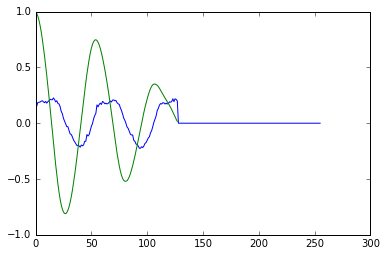

In [5]:
N=256
N2=int(N/2)

x=data
x=(x-512)/512
x[N2:N] = np.zeros(N2)
plt.plot(x)

# smarter way paper
F=np.fft.fft(x)
#plt.plot(np.real(F))
ps=np.real(F*np.conjugate(F))
Finv=np.fft.ifft(ps)
r=np.real(Finv)
x2=x*x
m=np.zeros(N2)
for i in np.arange(N2):
    m[i]=funcM(x2,i)
#plt.plot(m)
r=r[0:N2]
nsdf=2*r/m
plt.plot(nsdf)
print("nsdf[0]=", nsdf[0], ",nsdf[53]=", nsdf[53], "nsdf[54]=", nsdf[54], "nsdf[55]=", nsdf[55])
print(nsdf)

-- fft --
[ 0.02379608+0.j          0.00487707-0.00570675j  0.01533153-0.00355724j
  0.00362602+0.00440831j  0.04495495-0.01061752j -0.01188325-0.05234908j
 -0.02010424+0.00693431j -0.00017196-0.00829901j -0.00847255+0.0045621j
  0.00438474-0.00012696j]
-- ps --
[ 0.07248045  0.00721317  0.03170685  0.0041704   0.27311095  0.36884964
  0.05788996  0.00881961  0.0118524   0.00246299]
-- ifft --
[-0.00424435 -9.74386998e-18j -0.00400457 -1.08912687e-17j
 -0.00371806 -9.21571847e-19j -0.00339081 -2.03911387e-18j
 -0.00301302 -2.91537669e-18j -0.00260796 -3.67320452e-18j
 -0.00217231 -5.40550983e-19j -0.00172119 -1.03608986e-18j
 -0.00125400 -7.94043788e-19j -0.00077955 -5.75152537e-19j]
-- ms --
[ 0.01300512  0.01296756  0.01292223  0.01285499  0.01278633  0.01271623
  0.01264022  0.01256118  0.01248962  0.01242379]
max r= 0.00650256127119 , max m= 0.0130051225424
-- nsdf --
[ 1.          0.98470822  0.96021375  0.92441265  0.87741878  0.8211371
  0.75618523  0.68311493  0.6043909   0.519

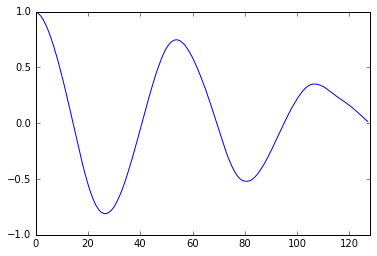

In [6]:

# overflow considering
F=np.fft.fft(x)/N             #scale to avoid overflow here
print("-- fft --")
print(F[0:10])
ps=np.real(F*np.conjugate(F))*N/2  #multiply N to get better resolution
print("-- ps --")
print(ps[0:10])
#plt.plot(ps[30:40])
ifftps=np.fft.ifft(ps)           #no scaling
print("-- ifft --")
print(ifftps[30:40])
r=np.real(ifftps)
#plt.plot(r)
x2=x*x/(N*2)                       #avoid overflow
m=np.zeros(N2)
for i in np.arange(N2):
    m[i]=funcM(x2,i)
print("-- ms --")
print(m[0:10])
#plt.plot(m)
r=r[0:N2]
print("max r=", np.max(r), ", max m=", np.max(m))
nsdf=2*r/(m)                #avoid overflow here
print("-- nsdf --")
print(nsdf[0:10])
plt.plot(nsdf)
plt.xlim([0,N2])
plt.show()

In [10]:
#512*1024adc and min, max w/o advertising
ts=np.array([38902980, 38901476, 38900266, 38900491, 38900613,38900814 ])
ts=ts*2/1000/1000

In [11]:
print(ts)
tavg=np.average(ts)
T=tavg

print("1024*1024 sampling took T=",T, "sec")
freq=1/(T)*1024*1024
print("freq per sample=", round(freq), "T per sample=", T/(1024*1024))
print("freq per 1024samples=", round(freq*1024))
ns=np.arange(128)
freqs=1/(ns*T/1024/1024)
freqs[0]=0
#print("freqs=\n", freqs)
k=np.log10(2**(1/12))
midinotes=np.round(np.log10(freqs/27.5)/k)+21
midinotes[0]=0
# array to use in program
print(midinotes)

[ 77.80596   77.802952  77.800532  77.800982  77.801226  77.801628]
1024*1024 sampling took T= 77.8022133333 sec
freq per sample= 13477.0 T per sample= 7.41979726156e-05
freq per 1024samples= 13800916.0
[   0.  128.  116.  109.  104.  100.   97.   95.   92.   90.   88.   87.
   85.   84.   83.   81.   80.   79.   78.   77.   76.   76.   75.   74.
   73.   73.   72.   71.   71.   70.   69.   69.   68.   68.   67.   67.
   66.   66.   65.   65.   64.   64.   64.   63.   63.   62.   62.   62.
   61.   61.   61.   60.   60.   60.   59.   59.   59.   58.   58.   58.
   57.   57.   57.   57.   56.   56.   56.   55.   55.   55.   55.   54.
   54.   54.   54.   53.   53.   53.   53.   53.   52.   52.   52.   52.
   52.   51.   51.   51.   51.   51.   50.   50.   50.   50.   50.   49.
   49.   49.   49.   49.   49.   48.   48.   48.   48.   48.   48.   47.
   47.   47.   47.   47.   47.   46.   46.   46.   46.   46.   46.   46.
   45.   45.   45.   45.   45.   45.   45.   44.]


In [12]:
k=np.log10(2**(1/12))
np.round(np.log10(258.3026/27.5)/k)+21

60.0

In [13]:
ns8=np.arange(128*8)
freqs8=1/((ns8/8)*T/1024/1024)
freqs8[0]=0
#print("freqs=\n", freqs)
midinotes8=np.round(np.log10(freqs8/27.5)/k)+21
midinotes8[0] = 0
# array to use in program
print(midinotes8)
f = open('NoteTable8.h', 'w')
f.write("#ifndef _NOTETABLE8_H_\n")
f.write("#define _NOTETABLE8_H_\n\n")
f.write("static const uint8_t kNoteTable8[] = {\n")
counter=0
for x in midinotes8 :
    if(counter % 8 == 0) :
        f.write("\t")
    f.write(np.str(int(x)))
    if(counter+1<np.size(midinotes8)):
        f.write(",")
    if(counter % 8 == 7) :
        f.write("\n")
    counter=counter+1
f.write("};\n\n")
f.write("#endif\n\n")
f.close()

[   0.  164.  152. ...,   44.   44.   44.]


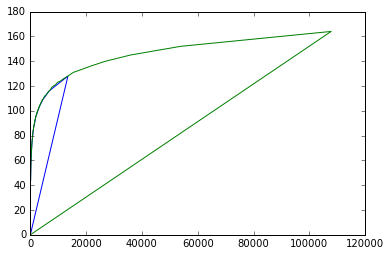

[     0.          13477.45719659   6738.7285983    4492.4857322
   3369.36429915   2695.49143932   2246.2428661    1925.35102808
   1684.68214957   1497.49524407   1347.74571966   1225.22338151
   1123.12143305   1036.72747666    962.67551404    898.49714644
    842.34107479    792.7915998     748.74762203    709.33985245
    673.87285983    641.78367603    612.61169075    585.97639985
    561.56071652    539.09828786    518.36373833    499.16508136
    481.33775702    464.73990333    449.24857322    434.75668376
    421.17053739    408.40779384    396.3957999     385.07020562
    374.37381102    364.25559991    354.66992623    345.57582555
    336.93642991    328.71846821    320.89183801    313.42923713
    306.30584538    299.49904881    292.98819993    286.75440844
    280.78035826    275.05014687    269.54914393    264.2638666
    259.18186917    254.29164522    249.58254068    245.0446763
    240.66887851    236.44661748    232.36995167    228.43147791
    224.62428661    220.9419

In [14]:
#plt.plot(freqs, midinotes, freqs8, midinotes8)
#plt.plot(freqs, midinotes)
plt.plot(freqs, midinotes, freqs8, midinotes8)
#plt.plot(ns8/8)
plt.show()
print(freqs)
print(freqs8)

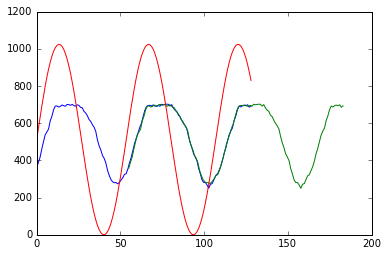

In [21]:
freq=252
tn=(T/1024)*(N/1024)
wn=freq*tn
sig=np.sin(wn*2*np.pi * ts/256)+1
sig=sig*512
plt.plot(ts,data[0:128], ts+55,data[0:128], ts,sig)
